In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import os


# EDA

In [3]:
application_train=pd.read_csv(r'D:\kaggle\home credit risk\DATA\application_train.csv')


In [42]:
data=r'D:\kaggle\home credit risk\DATA'
for i in os.listdir(data):
    print(i)
    globals()[i[:-4]]=pd.read_csv(os.path.join(data,i),encoding='ascii')

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


SyntaxError: invalid syntax (<ipython-input-38-58b4bb66bfc2>, line 1)

In [34]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
pd.set_option('display.max_columns', 100)

In [7]:
application_train.info()
print(application_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.57390

Look at missing value.

In [13]:
null=pd.concat([application_train.isnull().sum().sort_values(ascending=False),
                application_train.isnull().sum()/application_train.shape[0]],
              join_axes=[application_train.isnull().sum().sort_values(ascending=False).index],
              axis=1)
null

,0,1
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


Have a look at the distribution of data.

D:\anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


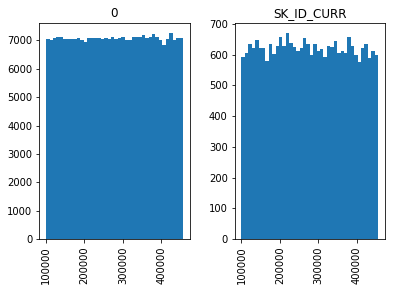

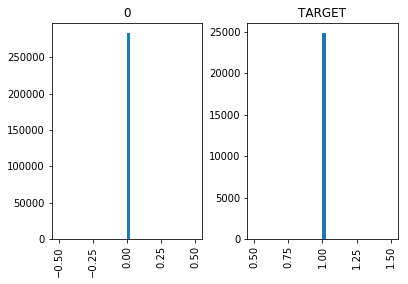

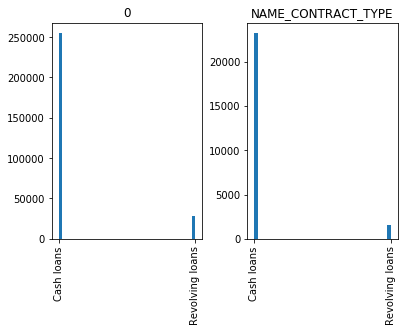

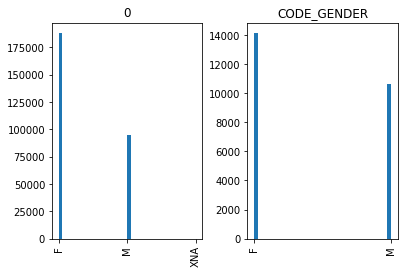

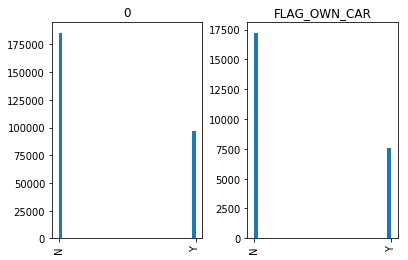

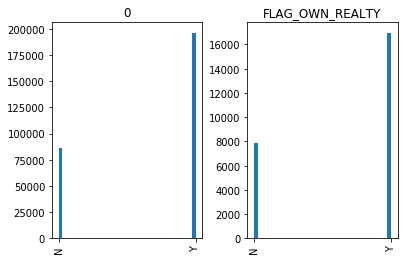

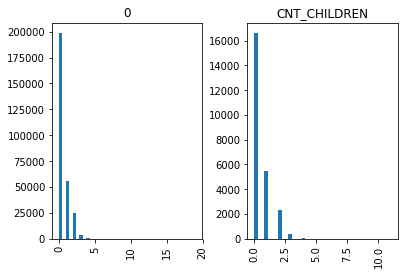

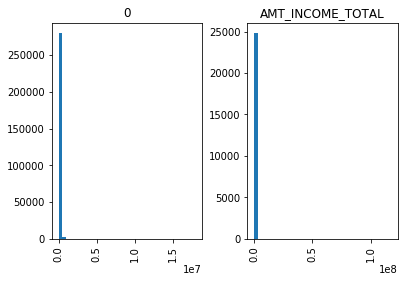

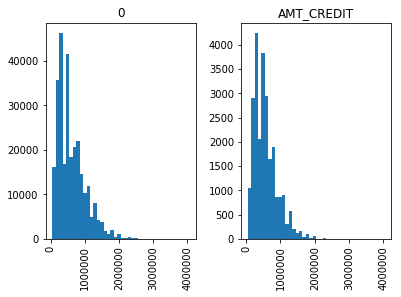

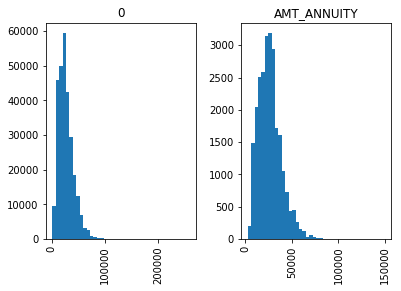

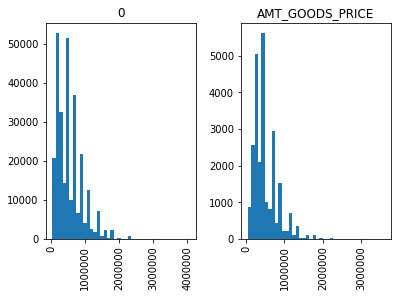

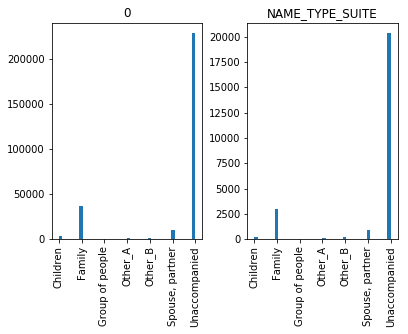

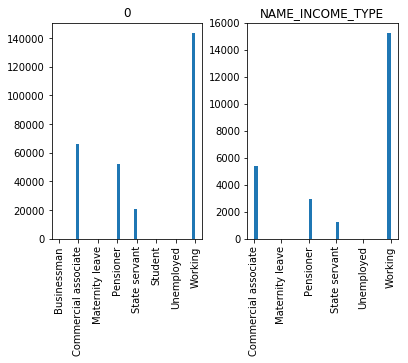

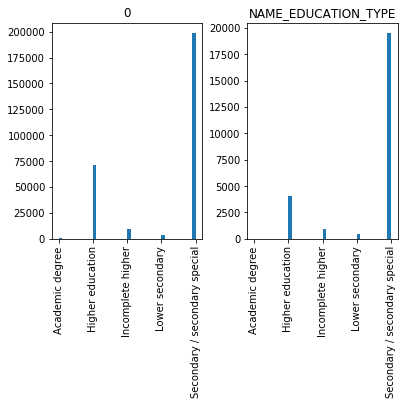

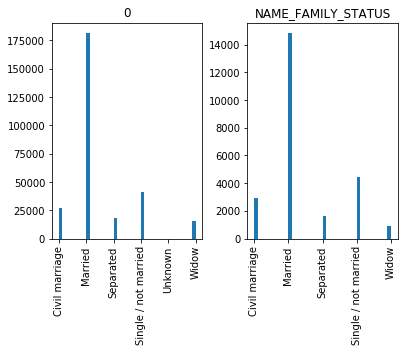

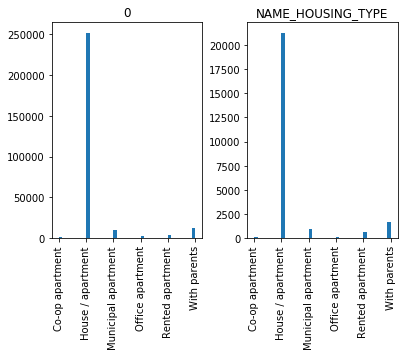

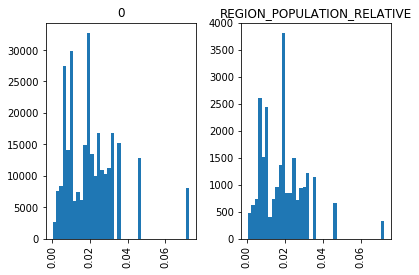

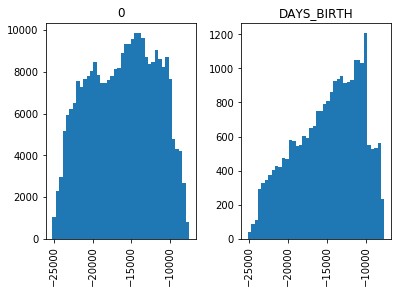

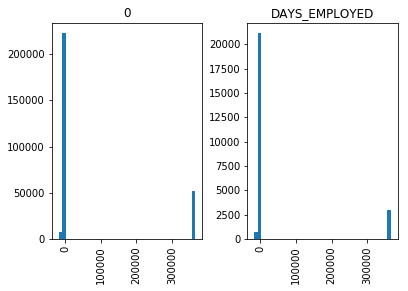

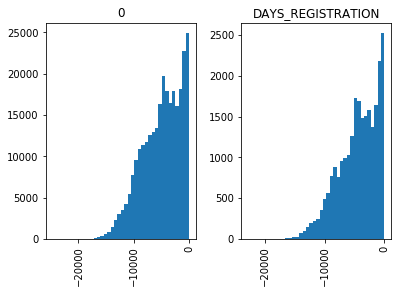

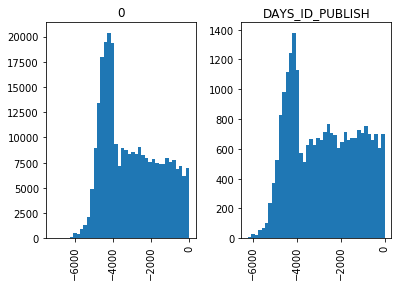

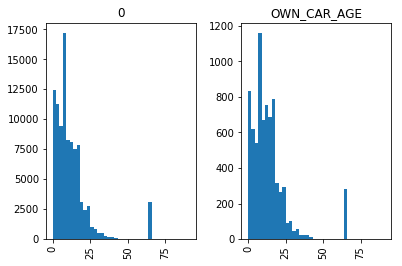

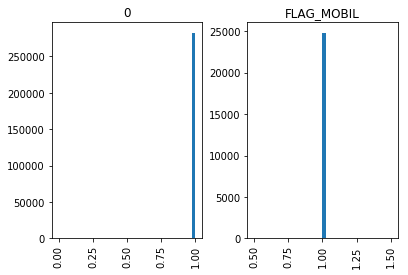

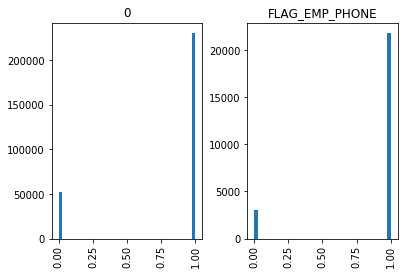

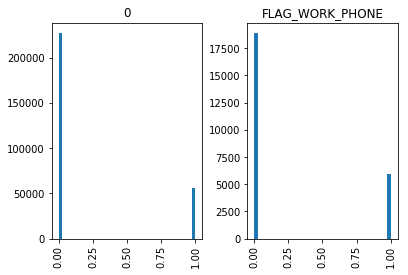

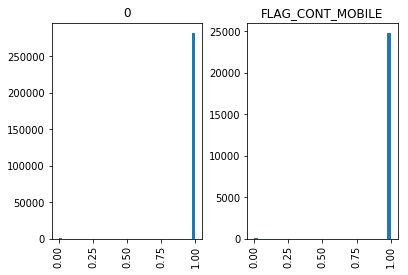

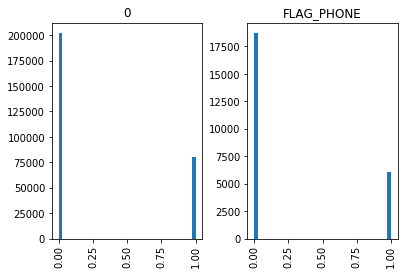

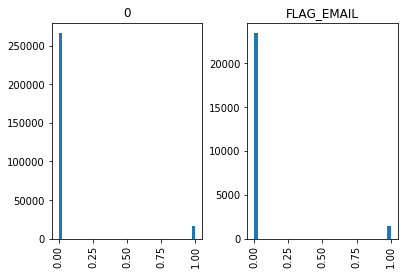

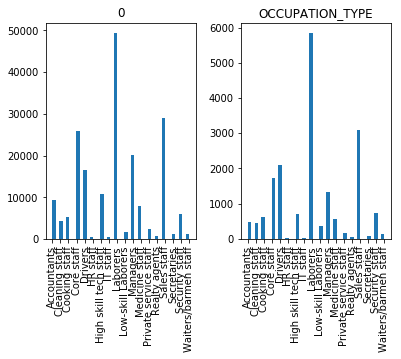

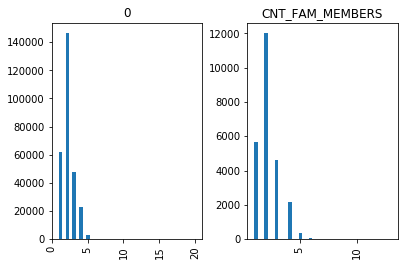

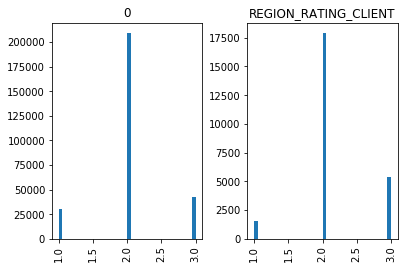

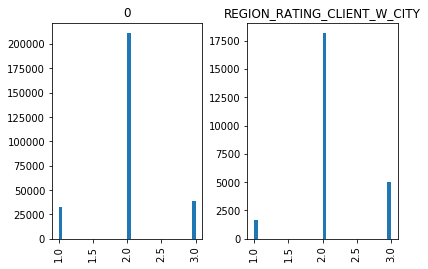

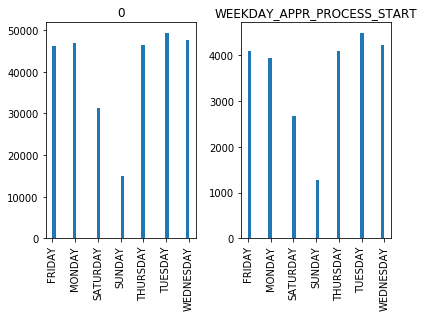

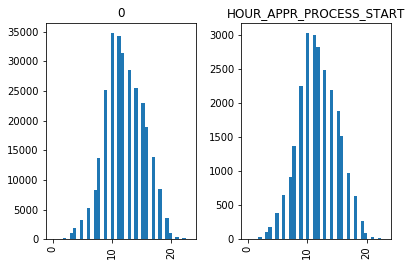

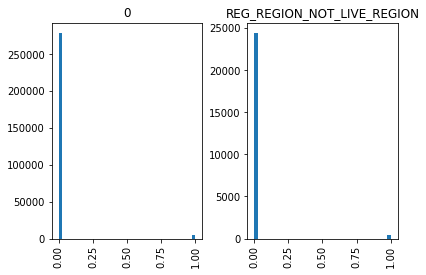

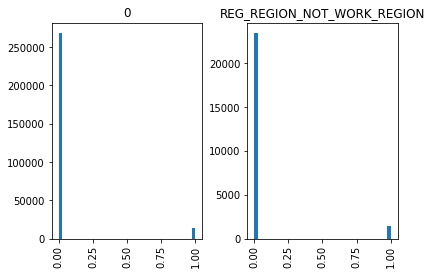

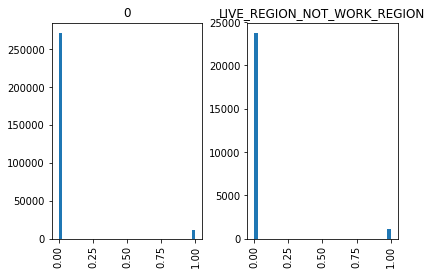

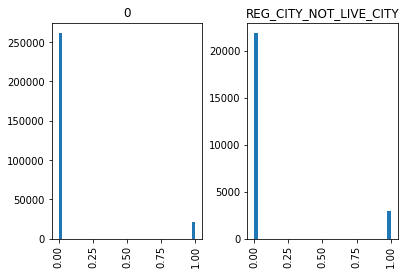

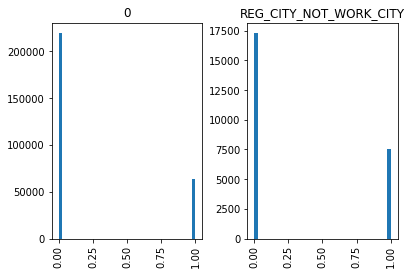

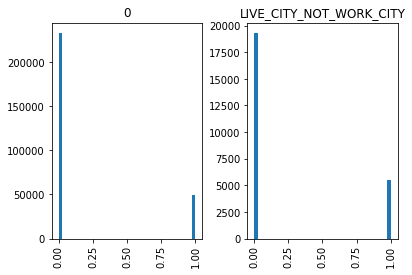

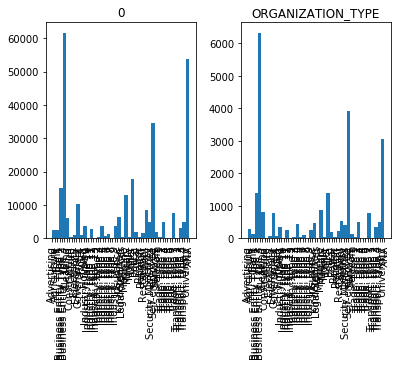

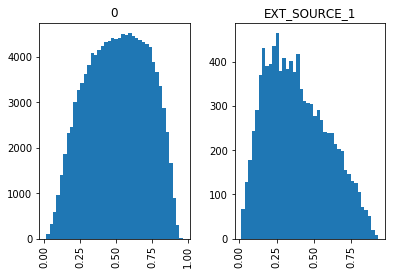

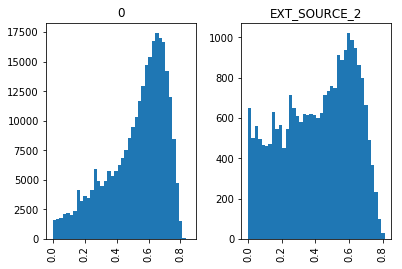

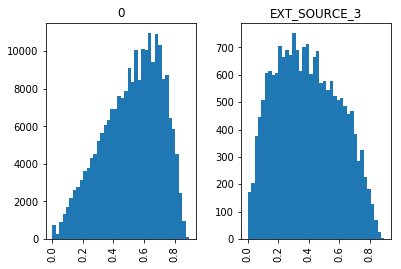

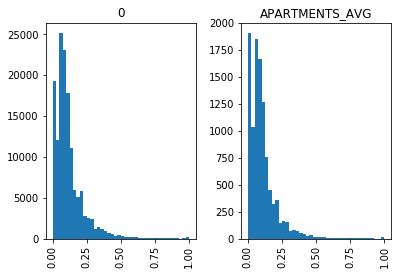

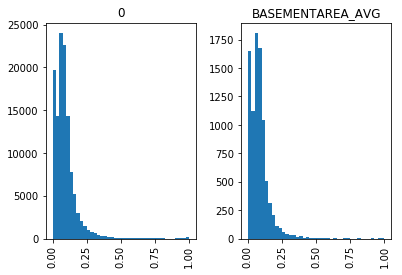

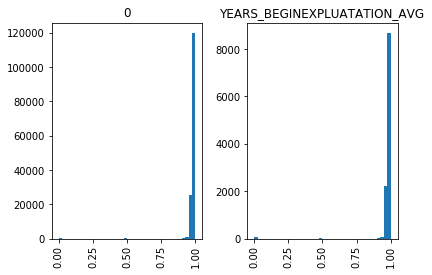

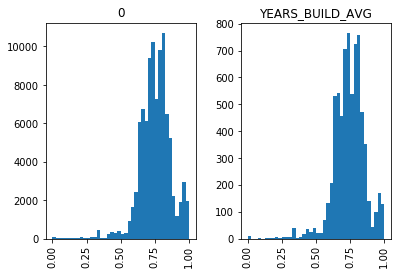

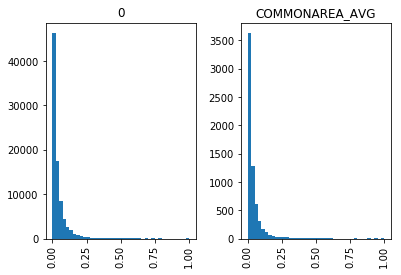

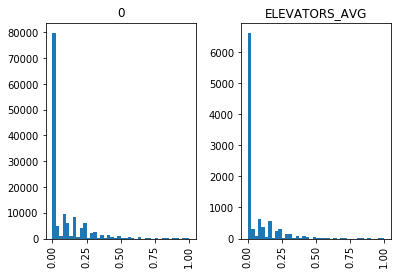

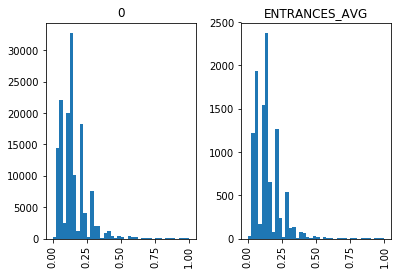

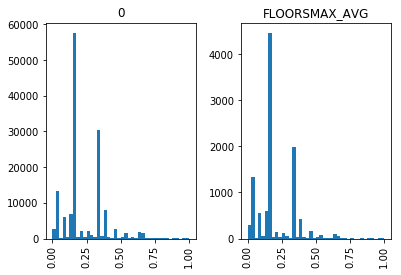

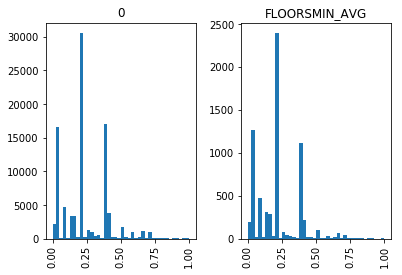

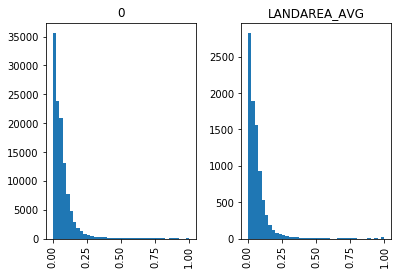

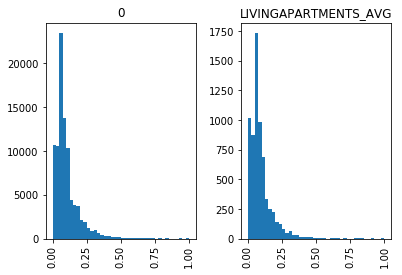

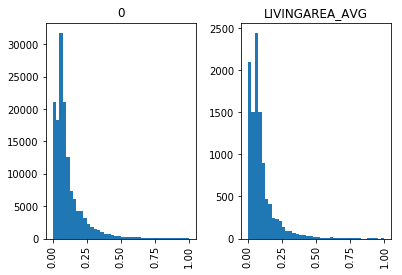

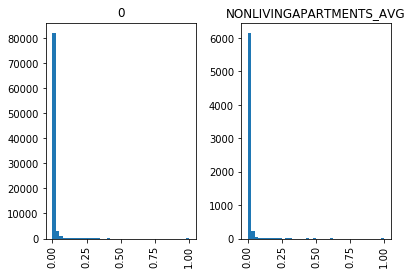

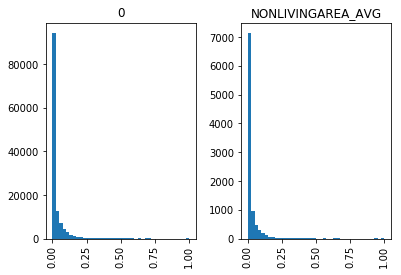

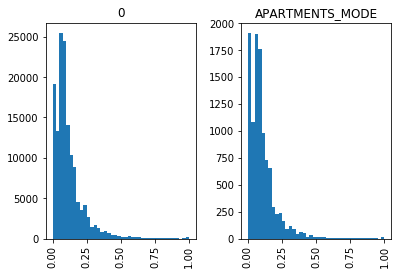

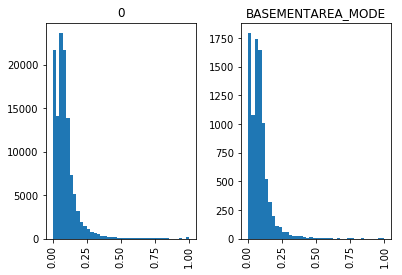

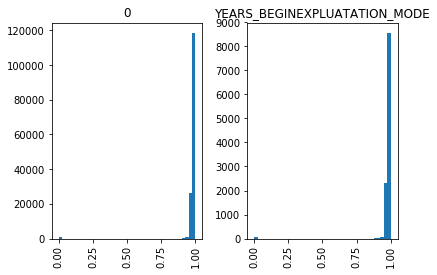

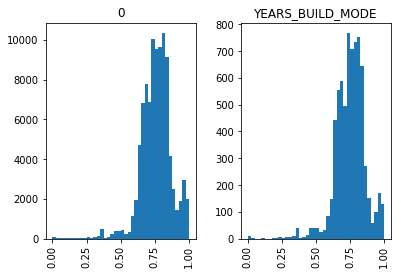

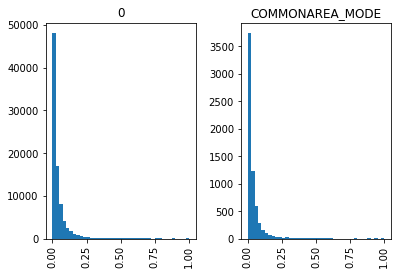

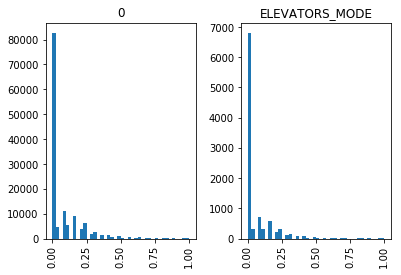

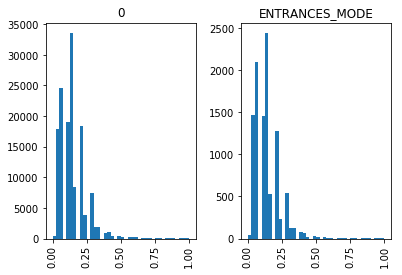

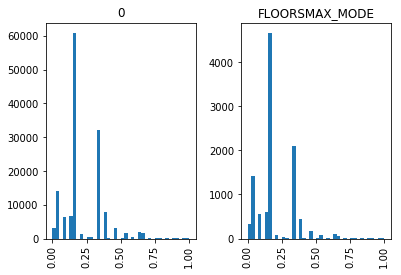

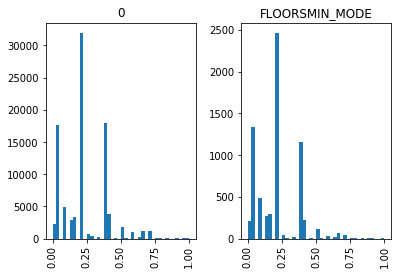

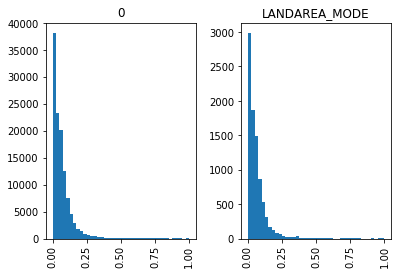

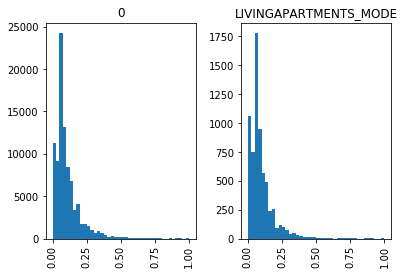

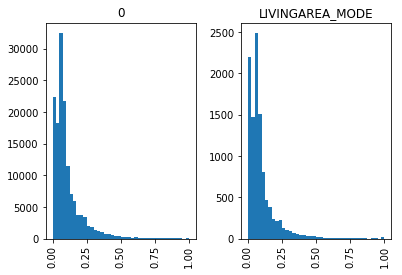

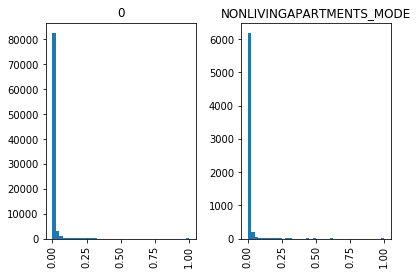

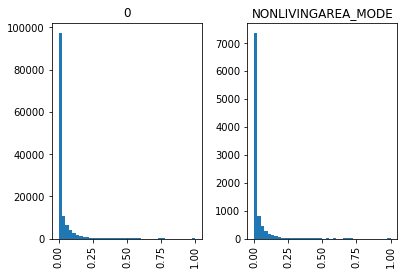

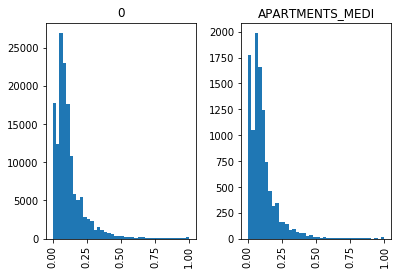

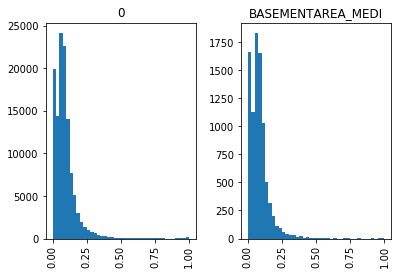

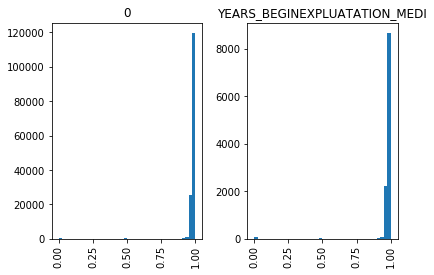

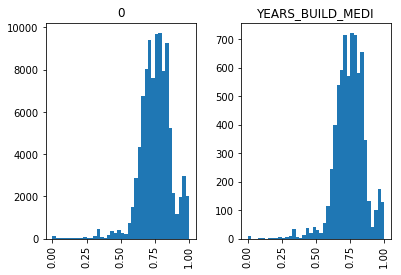

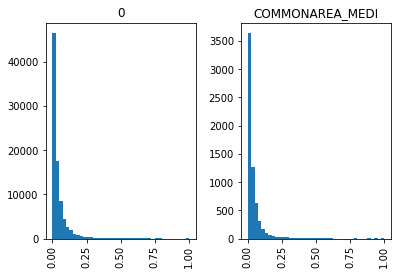

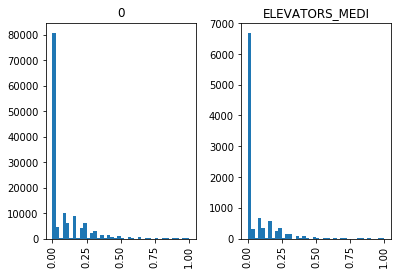

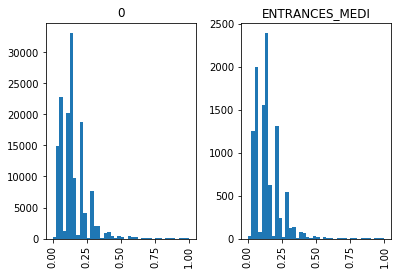

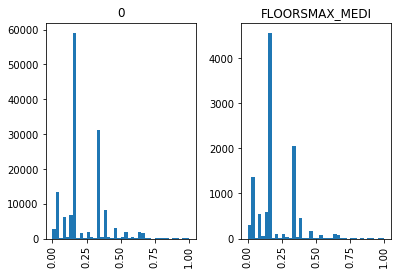

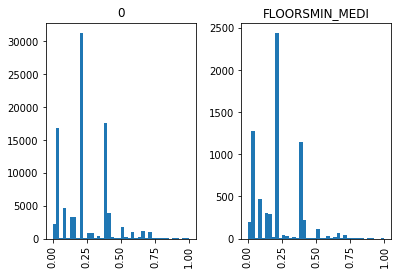

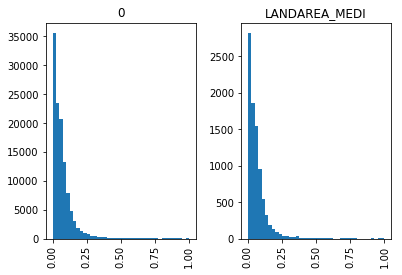

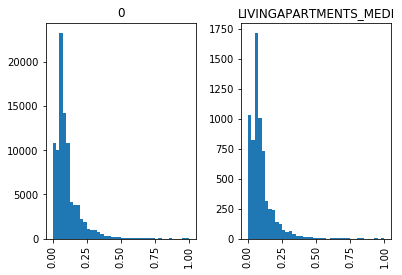

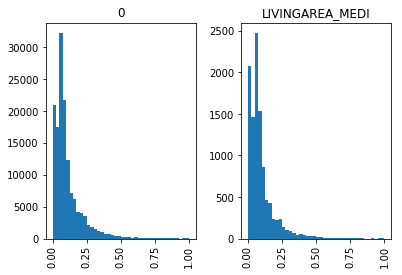

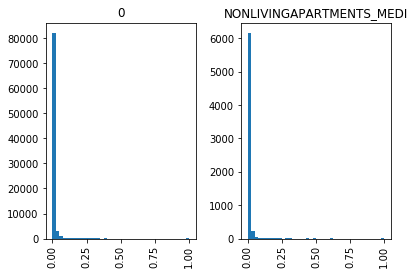

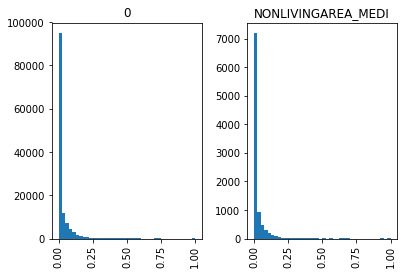

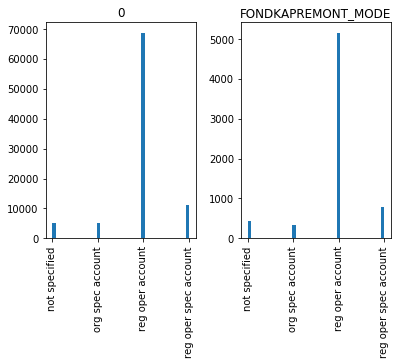

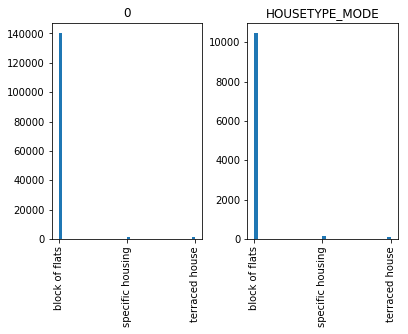

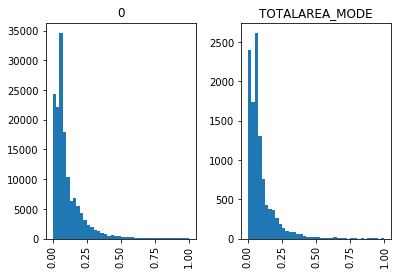

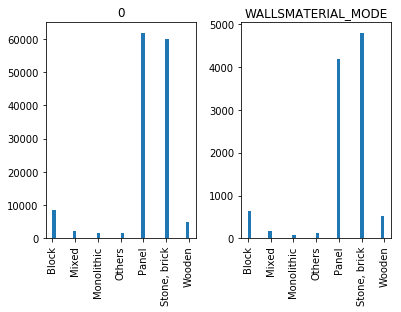

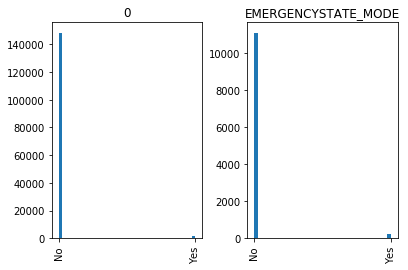

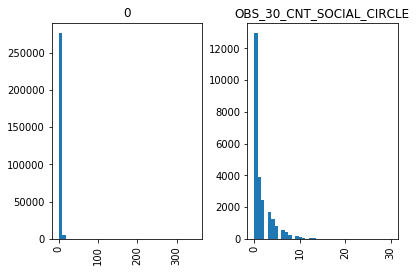

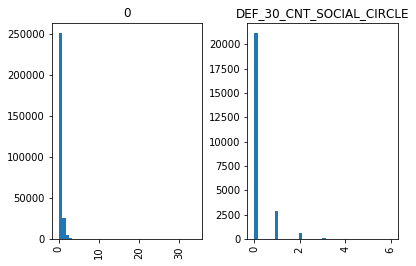

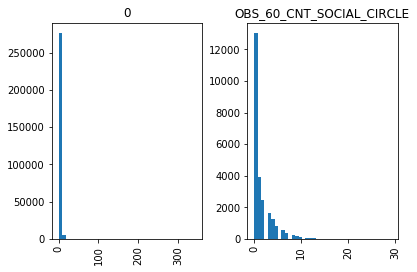

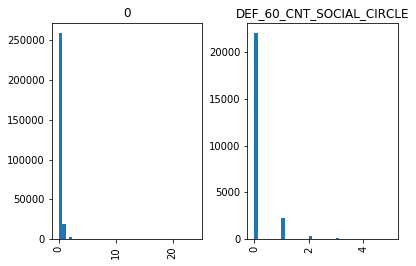

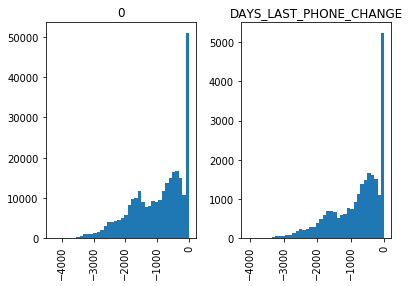

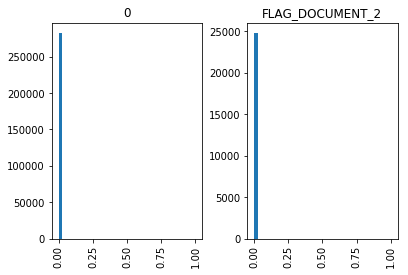

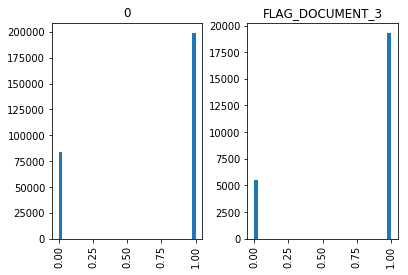

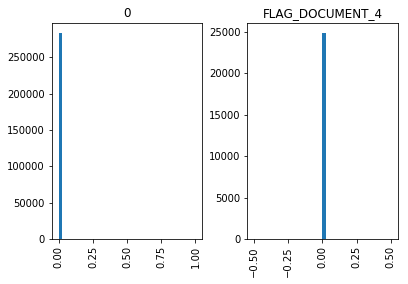

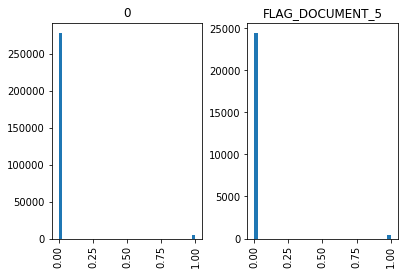

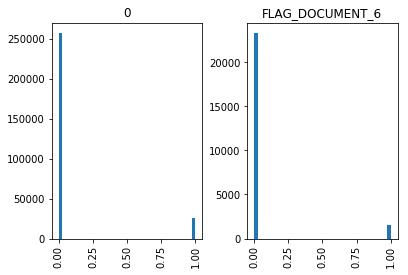

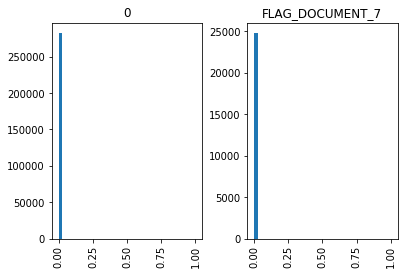

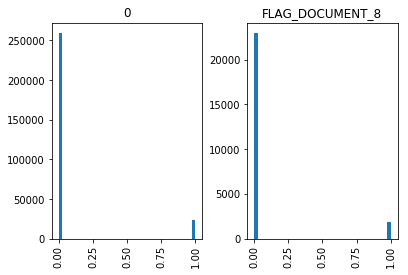

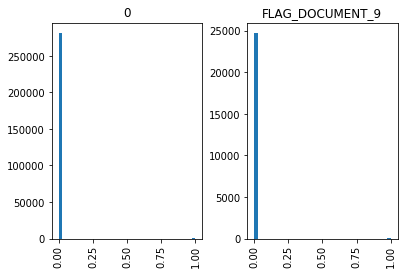

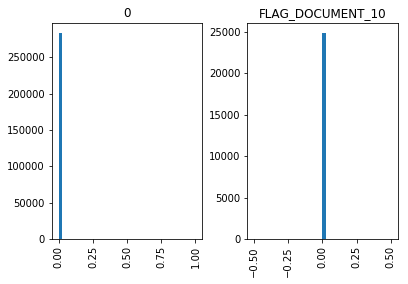

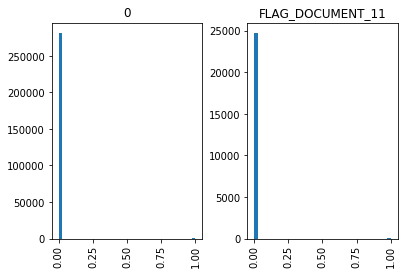

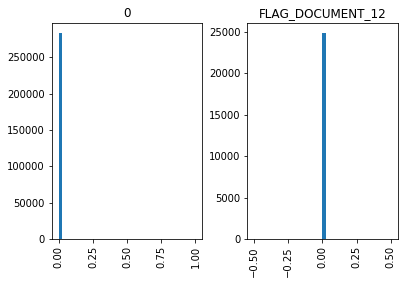

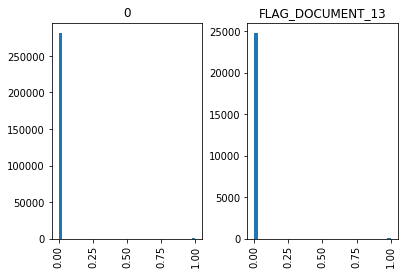

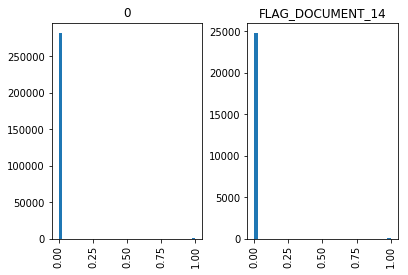

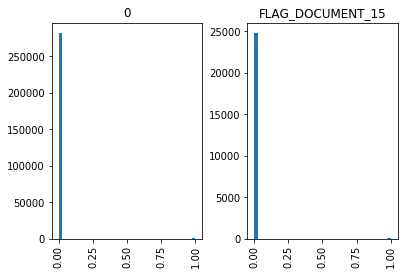

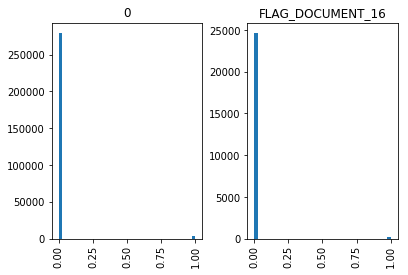

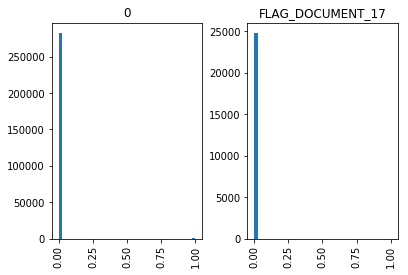

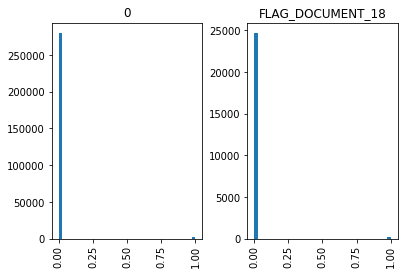

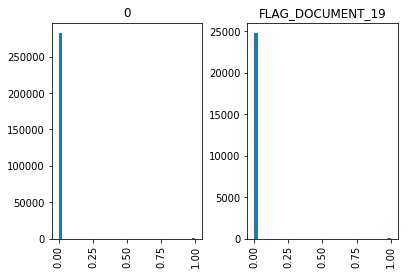

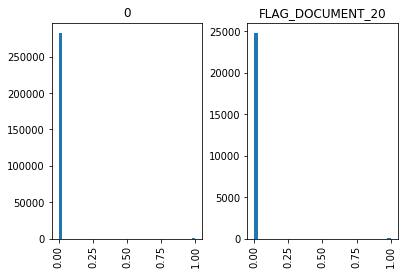

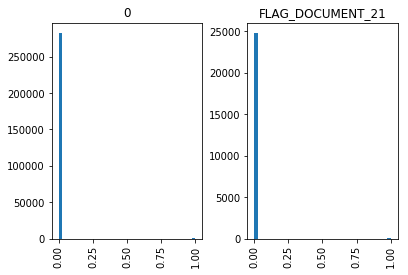

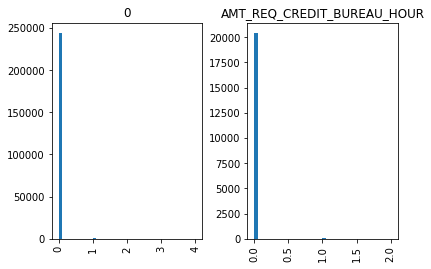

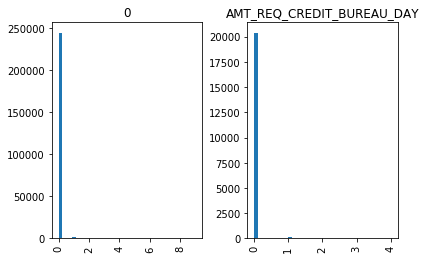

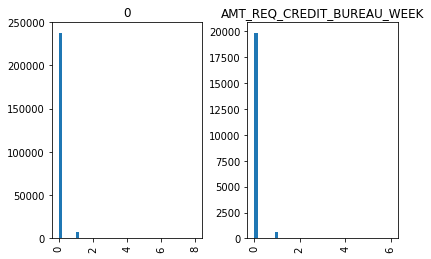

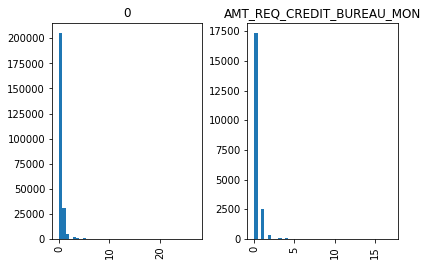

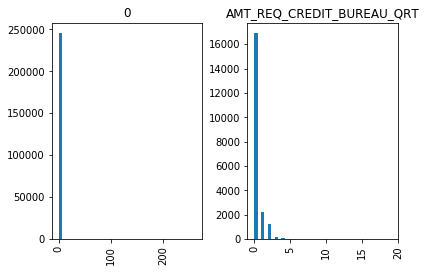

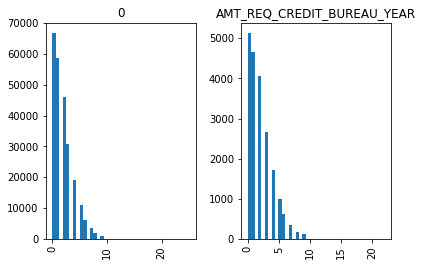

In [13]:
for i in application_train.columns:
    application_train.hist(i,by='TARGET',bins=40)
    plt.title(i)

from the histogram we can see most variables have similar distribution.
However we can find out some special cases which may be the important features.
here are the examples

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002250D46F6D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002250D4AACC0>], dtype=object)

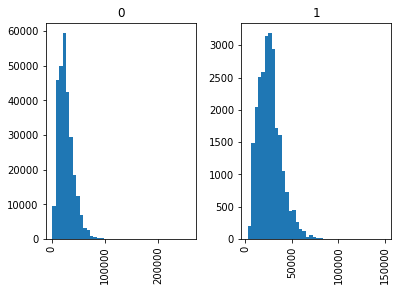

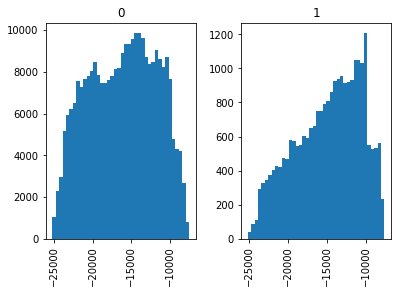

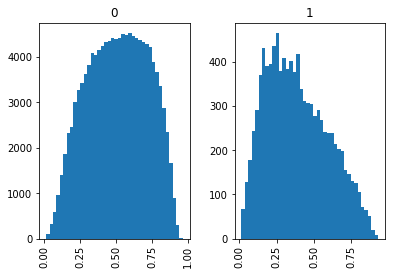

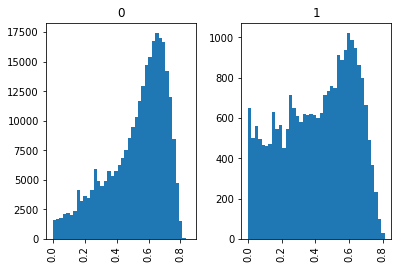

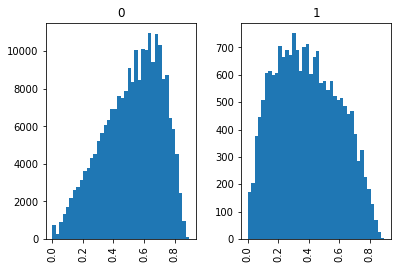

In [14]:
application_train.hist('AMT_ANNUITY',by='TARGET',bins=40)
application_train.hist('DAYS_BIRTH',by='TARGET',bins=40)
application_train.hist('EXT_SOURCE_1',by='TARGET',bins=40)
application_train.hist('EXT_SOURCE_2',by='TARGET',bins=40)
application_train.hist('EXT_SOURCE_3',by='TARGET',bins=40)

How to deal with long tail distribution?
use log?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002250D463048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002250D2907B8>], dtype=object)

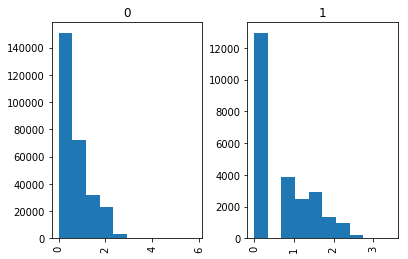

In [25]:
a=np.log(application_train['OBS_30_CNT_SOCIAL_CIRCLE']+1)
b=application_train.TARGET
c=pd.DataFrame({'data':a,'TARGET':b})
c.hist('data',by='TARGET')

# Feture Engineering

## day of birth 

In [ ]:
# some feture engineering
# the age,time
application_train['EMPLOYEED_T_P']=application_train['DAYS_EMPLOYEED']/application_train['DAYS_BIRTH']
application_train['OWNCAR_T_P']=application_train['OWN_CAR_AGE']/(application_train['DAYS_BIRTH']/365)
application_train['EMPLOYEED_T_P']=application_train['DAYS_EMPLOYEED']/application_train['DAYS_BIRTH']
    

## income and loan amount

In [43]:
application_train['CREDIT_P']=application_train.AMT_CREDIT/application_train.AMT_INCOME_TOTAL
application_train['ANNUITY_P']=application_train.AMT_ANNUITY/application_train.AMT_INCOME_TOTAL


0         0.498036
1         0.208736
2         0.500000
3         0.431748
4         0.236842
5         0.201837
6         0.109564
7         0.235294
8         0.110336
9         0.333333
10        0.172414
11        0.258950
12        0.834725
13        0.244973
14        0.244287
15        0.525399
16        0.211930
17        0.300000
18        0.714286
19        0.165292
20        0.315789
21        0.178796
22        0.904486
23        0.347092
24        0.545455
25        0.400000
26        0.114797
27        0.344011
28        0.341413
29        0.500000
            ...   
307481    0.757576
307482    0.449491
307483    0.400364
307484    0.990753
307485    1.500000
307486    0.822701
307487    0.109151
307488    1.166667
307489    0.431630
307490    0.600000
307491    0.083472
307492    0.371429
307493    0.142591
307494    0.562852
307495    0.222593
307496    1.066667
307497    0.666356
307498    0.150902
307499    0.360000
307500    0.200182
307501    0.300501
307502    0.

## combination of family status and housing type
married and live with parent

In [ ]:
application_train['living_condition']

In [45]:
def df_log(df,column,re=False):
    a=pd.DataFrame({'data':np.log(application_train[column]+1),'TARGET':df['TARGET']})
    a.hist('data',by='TARGET',bins=40)
    if re:
        return(a)
    

AttributeError: 'AxesSubplot' object has no attribute 'show'

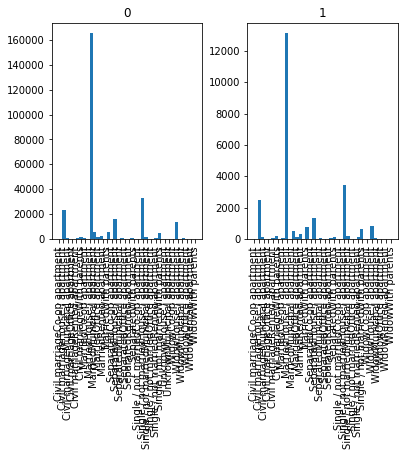

In [49]:
a=pd.DataFrame({
    'living':application_train.NAME_FAMILY_STATUS+application_train.NAME_HOUSING_TYPE,
    'TARGET':application_train.TARGET
}).hist('living',by='TARGET',bins=40)
a[0].show()

In [ ]:
df_log()

# feature selection -- algorithm method

## Variance analysis: 

In [16]:
a=application_train.var()

In [17]:
a.sort_values()

FLAG_MOBIL                      3.251916e-06
FLAG_DOCUMENT_12                6.503811e-06
FLAG_DOCUMENT_10                2.276297e-05
FLAG_DOCUMENT_2                 4.227326e-05
FLAG_DOCUMENT_4                 8.129156e-05
REGION_POPULATION_RELATIVE      1.913043e-04
FLAG_DOCUMENT_7                 1.918269e-04
FLAG_DOCUMENT_17                2.665869e-04
FLAG_DOCUMENT_21                3.348363e-04
FLAG_DOCUMENT_20                5.070432e-04
FLAG_DOCUMENT_19                5.947485e-04
FLAG_DOCUMENT_15                1.208253e-03
FLAG_CONT_MOBILE                1.863122e-03
NONLIVINGAPARTMENTS_MODE        2.141493e-03
NONLIVINGAPARTMENTS_MEDI        2.248156e-03
NONLIVINGAPARTMENTS_AVG         2.278312e-03
FLAG_DOCUMENT_14                2.927867e-03
YEARS_BEGINEXPLUATATION_AVG     3.507401e-03
FLAG_DOCUMENT_13                3.512662e-03
YEARS_BEGINEXPLUATATION_MEDI    3.587689e-03
FLAG_DOCUMENT_9                 3.880631e-03
FLAG_DOCUMENT_11                3.896764e-03
YEARS_BEGI

In [18]:
application_train[list(a.index)]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,...,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,...,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.000,490495.5

In [63]:
application_train['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

### if we don't standardize the data, the variance method will exclude some useful variables

In [19]:
normalize=application_train[list(a.index)].apply(lambda column:(column-np.nanmin(column))/(np.nanmax(column) - np.nanmin(column)),axis=0)

In [22]:
normalize.var().sort_values()

FLAG_MOBIL                     0.000003
AMT_INCOME_TOTAL               0.000004
FLAG_DOCUMENT_12               0.000007
AMT_REQ_CREDIT_BUREAU_QRT      0.000009
FLAG_DOCUMENT_10               0.000023
FLAG_DOCUMENT_2                0.000042
OBS_30_CNT_SOCIAL_CIRCLE       0.000048
OBS_60_CNT_SOCIAL_CIRCLE       0.000048
FLAG_DOCUMENT_4                0.000081
AMT_REQ_CREDIT_BUREAU_DAY      0.000151
DEF_30_CNT_SOCIAL_CIRCLE       0.000173
FLAG_DOCUMENT_7                0.000192
DEF_60_CNT_SOCIAL_CIRCLE       0.000228
FLAG_DOCUMENT_17               0.000267
FLAG_DOCUMENT_21               0.000335
AMT_REQ_CREDIT_BUREAU_HOUR     0.000439
FLAG_DOCUMENT_20               0.000507
FLAG_DOCUMENT_19               0.000595
AMT_REQ_CREDIT_BUREAU_WEEK     0.000655
AMT_REQ_CREDIT_BUREAU_MON      0.001151
FLAG_DOCUMENT_15               0.001208
CNT_CHILDREN                   0.001444
FLAG_CONT_MOBILE               0.001863
NONLIVINGAPARTMENTS_MODE       0.002141
NONLIVINGAPARTMENTS_MEDI       0.002248


In [20]:
unique=application_train[list(a.index)].apply(lambda column:len(column.unique()),axis=0)
unique

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13673
AMT_GOODS_PRICE                  1003
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OWN_CAR_AGE                        63
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    18
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT

In [28]:
p=pd.concat([normalize.var().sort_values(),unique],axis=1,join_axes=[normalize.var().sort_values().index])[:40]
p.columns=['VAR','# of unique values']
p

,VAR,# of unique values
FLAG_MOBIL,0.000003,2
AMT_INCOME_TOTAL,0.000004,2548
FLAG_DOCUMENT_12,0.000007,2
AMT_REQ_CREDIT_BUREAU_QRT,0.000009,12
FLAG_DOCUMENT_10,0.000023,2
FLAG_DOCUMENT_2,0.000042,2
OBS_30_CNT_SOCIAL_CIRCLE,0.000048,34
OBS_60_CNT_SOCIAL_CIRCLE,0.000048,34
FLAG_DOCUMENT_4,0.000081,2
AMT_REQ_CREDIT_BUREAU_DAY,0.000151,10


delete binary variables with low variance



In [26]:
delete=[]
for i in p.index:
    if 'DOCUMENT' in i:
        delete.append(i)
delete

['FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11']

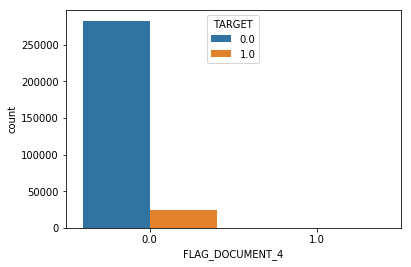

In [136]:
seaborn.countplot(x="FLAG_DOCUMENT_4",  hue="TARGET", data=normalize,capsize=.05)


In [ ]:
a.s

In [89]:
normalize

FLAG_MOBIL                     0.000003
AMT_INCOME_TOTAL               0.000004
FLAG_DOCUMENT_12               0.000007
AMT_REQ_CREDIT_BUREAU_QRT      0.000009
FLAG_DOCUMENT_10               0.000023
FLAG_DOCUMENT_2                0.000042
OBS_30_CNT_SOCIAL_CIRCLE       0.000048
OBS_60_CNT_SOCIAL_CIRCLE       0.000048
FLAG_DOCUMENT_4                0.000081
AMT_REQ_CREDIT_BUREAU_DAY      0.000151
DEF_30_CNT_SOCIAL_CIRCLE       0.000173
FLAG_DOCUMENT_7                0.000192
DEF_60_CNT_SOCIAL_CIRCLE       0.000228
FLAG_DOCUMENT_17               0.000267
FLAG_DOCUMENT_21               0.000335
AMT_REQ_CREDIT_BUREAU_HOUR     0.000439
FLAG_DOCUMENT_20               0.000507
FLAG_DOCUMENT_19               0.000595
AMT_REQ_CREDIT_BUREAU_WEEK     0.000655
AMT_REQ_CREDIT_BUREAU_MON      0.001151
FLAG_DOCUMENT_15               0.001208
CNT_CHILDREN                   0.001444
FLAG_CONT_MOBILE               0.001863
NONLIVINGAPARTMENTS_MODE       0.002141
NONLIVINGAPARTMENTS_MEDI       0.002248


For binary variables, low variance means they are not important.
so, variables of low variance and small number of unique values are more likely to be useless

## POS CASH BALANCE EDA

In [45]:
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [52]:
POS_CASH_balance['SK_DPD_DEF'].value_counts()

0       9887389
1         22134
2         14690
3         11652
4          9528
5          8031
6          6629
7          5425
8          4538
9          3935
10         3376
11         2889
12         2496
13         2112
14         1734
15         1378
16         1189
17         1001
18          941
19          808
20          726
21          600
22          486
23          435
24          323
25          273
26          266
28          175
27          166
29          119
         ...   
817           1
2395          1
1743          1
1385          1
813           1
812           1
2401          1
2171          1
1748          1
807           1
2405          1
805           1
1750          1
1751          1
1752          1
801           1
1753          1
1755          1
797           1
2409          1
1386          1
793           1
2408          1
2169          1
787           1
1390          1
1391          1
2410          1
1543          1
3595          1
Name: SK_DPD_DEF, Length

In [56]:
g1=POS_CASH_balance.groupby(by=['SK_ID_CURR','SK_ID_PREV']).mean()
g1

MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
SK_ID_CURR SK_ID_PREV                                                          
100001     1369693              -55.0        4.000000               2.000000   
           1851984              -94.5        4.000000               0.750000   
100002     1038818              -10.0       24.000000              15.000000   
100003     1810518              -21.5       11.375000               7.875000   
           2396755              -71.5       12.000000               6.500000   
           2636178              -24.5        6.000000               2.625000   
100004     1564014              -25.5        3.750000               2.250000   
100005     2495675              -20.0       11.700000               7.200000   
100006     2078043               -5.0       16.666667              16.000000   
           2190416               -5.5       12.000000               7.500000   
           2299329              -16.5       10.000000               7.142857   
100007     1692033               -6.5       24.000000              18.500000   
           1940724              -30.0       12.000000               6.000000   
           2001242              -19.5       17.333333               8.833333   
           2119973              -72.5       10.000000               5.500000   
           2462742              -52.0       12.000000               6.000000   
100008     1186888              -80.5        6.000000               3.375000   
           1907290              -50.0       10.000000               1.000000   
           2218188               -7.0       10.000000               4.272727   
           2613879              -17.0       27.555556              23.555556   
100009     1112703              -46.0       10.000000               5.000000   
           1193310              -46.0        6.000000               3.000000   
           1359598              -91.5        5.000000               1.000000   
           1413109               -8.0       12.000000               5.692308   
           2007057               -7.0        6.000000               3.000000   
           2227125               -7.0        6.000000               3.000000   
           2421381              -24.0        6.000000               3.000000   
           2797899               -1.5       10.000000               9.500000   
100010     2349489              -30.0       10.000000               5.000000   
100011     1430602              -61.0       11.977778               1.733333   
...                               ...             ...                    ...   
456244     2562354               -3.5       60.000000              57.500000   
           2766043              -24.5        7.000000               5.750000   
           2832289              -17.0       22.800000              21.000000   
456245     1100145               -9.0       12.000000               6.000000   
           1666363               -4.0       24.000000              20.857143   
456246     1129524              -47.0        6.000000               3.000000   
456247     1382810              -92.5        5.000000               2.500000   
           1522534              -13.0        4.000000               2.000000   
           2582033              -70.5       12.000000               6.500000   
           2797706              -20.5        6.000000               4.750000   
456248     1136073              -13.0       24.000000              12.391304   
           1395578              -85.0        6.000000               3.000000   
           1826280              -31.0       12.000000               6.000000   
456249     2660508              -44.0       12.000000               5.461538   
456250     1081068               -5.5       12.000000               7.500000   
           1740566              -18.0       12.000000               6.000000   
           1922117              -32.0        6.000000               3.000000   
456251     2248017     

In [55]:
num_of_credit=g1.groupby('SK_ID_CURR').count()

In [65]:
def complete_number(col):
    a=col['NAME_CONTRACT_STATUS'].value_counts()
    if 'Active' in a.index:
        return(a.sum()-a['Active'])
    else:
        return(a.sum())


In [67]:
num_complete=POS_CASH_balance.groupby(by=['SK_ID_CURR']).apply(lambda col:complete_number(col))
num_complete

SK_ID_CURR
100001    2
100002    0
100003    2
100004    1
100005    2
100006    3
100007    4
100008    5
100009    7
100010    1
100011    2
100012    3
100013    4
100014    1
100015    1
100016    3
100017    1
100018    2
100019    1
100020    1
100021    3
100022    0
100023    3
100025    3
100026    2
100027    1
100028    2
100029    1
100030    2
100032    1
         ..
456225    2
456226    5
456227    6
456228    7
456230    2
456231    5
456232    3
456233    0
456234    2
456235    1
456236    4
456237    3
456238    2
456239    1
456240    2
456241    3
456242    2
456243    3
456244    8
456245    1
456246    1
456247    3
456248    2
456249    1
456250    2
456251    2
456252    1
456253    2
456254    0
456255    6
Length: 337252, dtype: int64

In [68]:
def DPD_num(col):
    a=col['SK_DPD'].value_counts()
    try:
        return(a.sum()-a[0])
    except:
        return(a.sum())


In [69]:
num_DPD=POS_CASH_balance.groupby(by=['SK_ID_CURR']).apply(lambda col:DPD_num(col))

In [70]:
num_DPD

SK_ID_CURR
100001     1
100002     0
100003     0
100004     0
100005     0
100006     0
100007     0
100008    43
100009     0
100010     0
100011    35
100012     0
100013     2
100014     0
100015     1
100016     0
100017     0
100018     0
100019     0
100020     0
100021     0
100022     0
100023     0
100025     0
100026     0
100027     0
100028     0
100029     0
100030     0
100032     0
          ..
456225     0
456226     0
456227     0
456228     0
456230     0
456231     0
456232     0
456233     0
456234     1
456235     0
456236     0
456237     0
456238     0
456239     0
456240     0
456241     0
456242     0
456243     0
456244     2
456245     0
456246     0
456247     0
456248     4
456249     0
456250     0
456251     0
456252     0
456253     1
456254     0
456255     1
Length: 337252, dtype: int64

In [72]:
# CHECK 100008
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==100008]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
252978,2613879,100008,-19,30.0,28.0,Active,0,0
671303,2613879,100008,-13,8.0,0.0,Completed,0,0
938913,2613879,100008,-17,30.0,26.0,Active,0,0
1366622,1907290,100008,-72,10.0,5.0,Active,0,0
1647683,2218188,100008,-8,10.0,5.0,Active,0,0
2201580,1907290,100008,-68,10.0,1.0,Active,0,0
2212331,1186888,100008,-82,6.0,5.0,Active,0,0
2679078,1907290,100008,-73,10.0,6.0,Active,0,0
2919260,2613879,100008,-16,30.0,25.0,Active,0,0
3181758,1186888,100008,-78,6.0,1.0,Active,0,0


In [77]:
def DPD_mean(col):
    return(col['SK_DPD'][col['SK_DPD']!=0].mean())


In [81]:
mean_DPD=POS_CASH_balance.groupby(by=['SK_ID_CURR']).apply(lambda col:DPD_mean(col)).fillna(0)

In [80]:
mean_DPD

SK_ID_CURR
100001      7.000000
100002      0.000000
100003      0.000000
100004      0.000000
100005      0.000000
100006      0.000000
100007      0.000000
100008    654.465116
100009      0.000000
100010      0.000000
100011    440.714286
100012      0.000000
100013     17.000000
100014      0.000000
100015     13.000000
100016      0.000000
100017      0.000000
100018      0.000000
100019      0.000000
100020      0.000000
100021      0.000000
100022      0.000000
100023      0.000000
100025      0.000000
100026      0.000000
100027      0.000000
100028      0.000000
100029      0.000000
100030      0.000000
100032      0.000000
             ...    
456225      0.000000
456226      0.000000
456227      0.000000
456228      0.000000
456230      0.000000
456231      0.000000
456232      0.000000
456233      0.000000
456234     16.000000
456235      0.000000
456236      0.000000
456237      0.000000
456238      0.000000
456239      0.000000
456240      0.000000
456241      0.000000
45

In [82]:
sum_installment=POS_CASH_balance.groupby(by=['SK_ID_CURR']).sum()['CNT_INSTALMENT_FUTURE']

In [83]:
sum_installment

SK_ID_CURR
100001      13.0
100002     285.0
100003     162.0
100004       9.0
100005      72.0
100006     173.0
100007     592.0
100008     341.0
100009     242.0
100010      55.0
100011     525.0
100012     470.0
100013     551.0
100014      93.0
100015      55.0
100016     686.0
100017     345.0
100018     139.0
100019      63.0
100020      56.0
100021     161.0
100022     105.0
100023     231.0
100025     390.0
100026      92.0
100027     131.0
100028     314.0
100029      18.0
100030      21.0
100032      21.0
           ...  
456225     945.0
456226      42.0
456227     323.0
456228     645.0
456230     115.0
456231     281.0
456232     245.0
456233      75.0
456234      48.0
456235     368.0
456236     237.0
456237     573.0
456238      42.0
456239      10.0
456240     830.0
456241     778.0
456242     183.0
456243     112.0
456244     926.0
456245     224.0
456246      21.0
456247     122.0
456248     384.0
456249      71.0
456250     174.0
456251      35.0
456252      21.0
456

max DPD

In [ ]:
max_SK_DPD=POS_CASH_balance.groupby(by=['SK_ID_CURR']).max()['SK_DPD']

## installments_payments

In [9]:
ins = pd.read_csv(r'D:\kaggle\home credit risk\DATA\installments_payments.csv')

In [31]:
ins

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [28]:
#check data type transformation
ins[['DAYS_INSTALMENT','AMT_INSTALMENT','AMT_PAYMENT']].dtypes


DAYS_INSTALMENT    float64
AMT_INSTALMENT     float64
AMT_PAYMENT        float64
dtype: object

In [39]:
ins['AMT_INSTALMENT'].astype('float32')

0             6948.359863
1             1716.525024
2            25425.000000
3            24350.130859
4             2165.040039
5             5970.375000
6            29432.294922
7            17862.164062
8               70.739998
9            14308.469727
10           34620.523438
11           15031.080078
12              21.510000
13            6093.990234
14             301.859985
15            4844.924805
16            6882.839844
17           12514.049805
18            7875.000000
19            7283.294922
20           15219.000000
21           13494.915039
22           12949.200195
23             560.880005
24            5178.194824
25           10649.924805
26           16479.269531
27            5400.000000
28             503.459991
29           16274.790039
                ...      
13605371    344249.968750
13605372     24127.199219
13605373     18730.349609
13605374        67.500000
13605375        67.500000
13605376        67.500000
13605377     51394.679688
13605378    

In [37]:
(ins['AMT_PAYMENT'].astype('float16')==ins['AMT_INSTALMENT'].astype('float16'))

0            True
1            True
2            True
3            True
4           False
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
13605371    False
13605372    False
13605373    False
13605374    False
13605375    False
13605376    False
13605377    False
13605378    False
13605379    False
13605380    False
13605381    False
13605382    False
13605383    False
13605384    False
13605385    False
13605386    False
13605387    False
13605388    False
13605389    False
13605390    False
13605391    False
13605392    False
13605393    False
13605394    False
13605395  

In [38]:
ins['AMT_PAYMENT']==ins['AMT_INSTALMENT']

0            True
1            True
2            True
3            True
4           False
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
13605371    False
13605372    False
13605373    False
13605374    False
13605375    False
13605376    False
13605377    False
13605378    False
13605379    False
13605380    False
13605381    False
13605382    False
13605383    False
13605384    False
13605385    False
13605386    False
13605387    False
13605388    False
13605389    False
13605390    False
13605391    False
13605392    False
13605393    False
13605394    False
13605395  

In [41]:
# dtype change introduce error
((ins['AMT_PAYMENT'].astype('float16')==ins['AMT_INSTALMENT'].astype('float16'))!=(ins['AMT_PAYMENT']==ins['AMT_INSTALMENT'])).sum()

83132

In [ ]:
np.arra

In [12]:
ins.shape

(13605401, 8)

In [11]:
ins.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [18]:
ins[ins['AMT_PAYMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN
3764212,1562727,187345,0.0,23,-5.0,NaN,11401.740,NaN
3764213,1265332,167942,1.0,5,-14.0,NaN,11650.500,NaN
3764214,1531600,103793,1.0,25,-128.0,NaN,49741.020,NaN
3764215,1852469,103171,7.0,3,-49.0,NaN,311738.355,NaN
3764216,1054684,142217,0.0,38,-1469.0,NaN,67.500,NaN


In [19]:
ins[ins['AMT_PAYMENT']==0]
# there are 0 and NA value,maybe not to fillna

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
9171,1514613,197031,0.0,10,-2165.0,-2191.0,4500.0,0.0
27338,2769227,126104,0.0,10,-2311.0,-2304.0,7875.0,0.0
39555,1685553,110052,0.0,9,-2434.0,-2462.0,9000.0,0.0
51978,1522932,153001,0.0,21,-2479.0,-2509.0,9000.0,0.0
52839,2254262,197304,0.0,17,-2331.0,-2358.0,9000.0,0.0
62889,1514613,197031,0.0,8,-2226.0,-2255.0,4500.0,0.0
79832,2726206,128477,0.0,15,-2385.0,-2415.0,7875.0,0.0
81790,1618383,133914,0.0,21,-2240.0,-2269.0,5625.0,0.0
83015,1007055,155925,0.0,5,-2328.0,-2310.0,3375.0,0.0
91783,1756584,121829,0.0,30,-2415.0,-2444.0,6750.0,0.0


In [20]:
ins.sort_values(by=['SK_ID_CURR','SK_ID_PREV'])

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050
185679,1038818,100002,1.0,16,-115.0,-133.0,9251.775,9251.775
210205,1038818,100002,1.0,8,-355.0,-375.0,9251.775,9251.775
442432,1038818,100002,2.0,19,-25.0,-49.0,53093.745,53093.745


In [24]:
g=ins.groupby('SK_ID_CURR').apply(lambda col:(col['AMT_INSTALMENT']-col['AMT_PAYMENT']).sum())

In [22]:
ins['NUM_INSTALMENT_VERSION'].value_counts()
# should not be category

1.0      8485004
0.0      4082498
2.0       620283
3.0       237063
4.0        55274
5.0        48404
6.0        17092
7.0        16771
9.0         8359
8.0         7814
10.0        4637
11.0        4342
13.0        2951
12.0        2863
15.0        1917
14.0        1906
16.0        1283
17.0        1249
18.0         883
19.0         816
20.0         615
21.0         589
22.0         426
23.0         373
24.0         291
25.0         268
26.0         211
27.0         177
29.0         163
28.0         145
          ...   
35.0          46
39.0          42
36.0          36
37.0          33
38.0          29
40.0          19
43.0          19
41.0          18
42.0          18
44.0          13
61.0           8
45.0           8
72.0           7
46.0           5
47.0           4
48.0           3
49.0           3
50.0           3
52.0           3
51.0           2
53.0           1
54.0           1
55.0           1
56.0           1
57.0           1
58.0           1
59.0           1
178.0         

In [96]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [85]:
installments_payments.shape

(13605401, 8)

In [89]:
a=installments_payments[installments_payments['SK_ID_CURR']==199999]


we can see for a previous loan it might have complete records or just have a few latest but continuous records

In [93]:
a[a['SK_ID_PREV']==1485718]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
31335,1485718,199999,1.0,13,-1392.0,-1397.0,7446.150,7446.150
554686,1485718,199999,1.0,5,-1632.0,-1634.0,7446.150,7446.150
576283,1485718,199999,1.0,4,-1662.0,-1663.0,7446.150,7446.150
1223595,1485718,199999,1.0,6,-1602.0,-1618.0,7446.150,7446.150
1230651,1485718,199999,1.0,8,-1542.0,-1550.0,7446.150,7446.150
1455122,1485718,199999,1.0,11,-1452.0,-1464.0,7446.150,7446.150
1556366,1485718,199999,2.0,14,-1362.0,-1367.0,71253.135,71253.135
1608985,1485718,199999,1.0,3,-1692.0,-1701.0,7446.150,7446.150
1821440,1485718,199999,1.0,1,-1752.0,-1760.0,7446.150,7446.150
2241152,1485718,199999,1.0,10,-1482.0,-1492.0,7446.150,7446.150


In [99]:
sum((a[a['SK_ID_PREV']==1485718]['AMT_INSTALMENT']-a[a['SK_ID_PREV']==1485718]['AMT_PAYMENT'])>0)

0

default rate: # of not enough payment installments/# of total installments

In [102]:
def default_r(col):
    a=col['AMT_INSTALMENT']-col['AMT_PAYMENT']
    return(sum(a>0)/len(a))
    

In [103]:
default_rate=installments_payments.groupby(by=['SK_ID_CURR']).apply(lambda col:default_r(col))

In [104]:
default_rate

SK_ID_CURR
100001    0.000000
100002    0.000000
100003    0.000000
100004    0.000000
100005    0.000000
100006    0.000000
100007    0.090909
100008    0.057143
100009    0.000000
100010    0.000000
100011    0.176923
100012    0.104167
100013    0.129032
100014    0.526316
100015    0.000000
100016    0.324324
100017    0.000000
100018    0.000000
100019    0.000000
100020    0.000000
100021    0.000000
100022    0.000000
100023    0.000000
100025    0.391304
100026    0.000000
100027    0.000000
100028    0.176991
100029    0.000000
100030    0.000000
100032    0.285714
            ...   
456225    0.228426
456226    0.000000
456227    0.039216
456228    0.162162
456230    0.000000
456231    0.000000
456232    0.000000
456233    0.000000
456234    0.142857
456235    0.000000
456236    0.076336
456237    0.029851
456238    0.000000
456239    0.000000
456240    0.196429
456241    0.048780
456242    0.000000
456243    0.000000
456244    0.120301
456245    0.000000
456246    0.000000
4

default amount rate: sum of difference of installment amount and payment/sum of installment amount

In [113]:
def default_amount_r(col):
    a=col['AMT_INSTALMENT']-col['AMT_PAYMENT']
    try:
        return(a[a>0].sum()/col['AMT_INSTALMENT'].sum())
    except ZeroDivisionError:
        return(0)


In [114]:
default_amount_rate=installments_payments.groupby(by=['SK_ID_CURR']).apply(lambda col:default_amount_r(col))

In [115]:
default_amount_rate

SK_ID_CURR
100001    0.000000
100002    0.000000
100003    0.000000
100004    0.000000
100005    0.000000
100006    0.000000
100007    0.035715
100008    0.012362
100009    0.000000
100010    0.000000
100011    0.165503
100012    0.037130
100013    0.106228
100014    0.257311
100015    0.000000
100016    0.218642
100017    0.000000
100018    0.000000
100019    0.000000
100020    0.000000
100021    0.000000
100022    0.000000
100023    0.000000
100025    0.137774
100026    0.000000
100027    0.000000
100028    0.125028
100029    0.000000
100030    0.000000
100032    0.142885
            ...   
456225    0.147968
456226    0.000000
456227    0.035822
456228    0.048864
456230    0.000000
456231    0.000000
456232    0.000000
456233    0.000000
456234    0.032718
456235    0.000000
456236    0.073010
456237    0.001587
456238    0.000000
456239    0.000000
456240    0.092677
456241    0.019165
456242    0.000000
456243    0.000000
456244    0.046038
456245    0.000000
456246    0.000000
4

avg days past due: sum of difference between day of installment and actually payment/# of records

In [116]:
def avg_dpd(col):
    a=col['DAYS_INSTALMENT']-col['DAYS_ENTRY_PAYMENT']
    return(a.sum()/len(a))

In [118]:
average_dpd=installments_payments.groupby(by=['SK_ID_CURR']).apply(lambda col:avg_dpd(col))

In [121]:
average_dpd

SK_ID_CURR
100001     7.285714
100002    20.421053
100003     7.160000
100004     7.666667
100005    23.555556
100006    19.375000
100007     3.636364
100008   -26.114286
100009     8.588235
100010    11.900000
100011    -3.138462
100012    25.312500
100013     5.180645
100014     8.210526
100015    12.900000
100016     1.378378
100017    10.866667
100018     6.875000
100019    30.500000
100020     8.615385
100021    12.304348
100022    23.428571
100023    15.653846
100025    10.086957
100026     9.375000
100027     9.545455
100028     3.000000
100029    19.750000
100030    21.833333
100032    45.857143
            ...    
456225    -1.695431
456226    16.250000
456227     7.843137
456228     7.243243
456230    13.909091
456231    22.695652
456232    14.520000
456233    14.571429
456234     9.285714
456235    11.606061
456236     3.335878
456237     4.313433
456238    44.500000
456239     4.050000
456240     6.392857
456241     5.439024
456242    11.038462
456243    24.947368
456244   

## Bureau

In [2]:
bureau=pd.read_csv(r'D:\kaggle\home credit risk\DATA\bureau.csv')

In [3]:

bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.000,0.000,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.000,171342.000,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.500,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.500,0,2700000.000,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.000,0,180000.000,71017.380,108982.620,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.000,0,42103.800,42103.800,0.000,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.000,0,76878.450,0.000,0.000,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.000,0,103007.700,0.000,0.000,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000,0,4500.000,0.000,0.000,0.0,Credit card,-690,NaN


In [4]:
bureau.isnull().sum()/bureau.shape[0]

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [8]:
bureau[~bureau['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
768,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
769,380361,5715449,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.000,0.000,45000.000,0.0,Credit card,-130,2691.000
770,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.000,0.000,0.000,0.0,Consumer credit,-748,0.000
771,380361,5715452,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.000,0.000,0.000,0.0,Credit card,-818,0.000
772,380361,5715453,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.000,0.000,0.000,0.0,Consumer credit,-769,0.000
773,380361,5715454,Closed,currency 1,-1622,0,-1074.0,-1073.0,NaN,0,540000.000,0.000,0.000,0.0,Consumer credit,-1006,0.000
776,380361,5715457,Active,currency 1,-222,0,874.0,NaN,NaN,0,202500.000,31594.500,0.000,0.0,Credit card,-18,0.000
777,380361,5715458,Closed,currency 1,-749,0,-111.0,-110.0,NaN,0,1267843.500,0.000,NaN,0.0,Consumer credit,-110,0.000
778,380361,5715459,Active,currency 1,-629,0,31069.0,NaN,NaN,0,72873.000,0.000,NaN,0.0,Credit card,-36,0.000
779,380361,5715460,Active,currency 1,-233,0,498.0,NaN,NaN,0,168525.000,NaN,NaN,0.0,Consumer credit,-16,0.000


In [188]:
sum((bureau['AMT_CREDIT_SUM_OVERDUE']>0))/bureau.shape[0]
# there is little overdue records

0.0024224727165951614

In [189]:
bureau['credit lenth']=bureau['DAYS_CREDIT_ENDDATE']-bureau['DAYS_CREDIT']

CREDIT_CURRENCY is almost currency1, while AMT_ANNUITY is almost NaN.

In [ ]:
bureau['FE_']

In [154]:
bureau['DAYS_CREDIT_ENDDATE']=bureau['DAYS_CREDIT_ENDDATE'].fillna(0)
bureau['AMT_CREDIT_MAX_OVERDUE']=bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT']=bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
bureau['AMT_CREDIT_SUM_LIMIT']=bureau['AMT_CREDIT_SUM_LIMIT'].fillna(0)


In [175]:
# 方便计算平均值
bureau['AMT_CREDIT_SUM_DEBT']=bureau['AMT_CREDIT_SUM_DEBT'].replace(0,np.nan)
bureau['AMT_CREDIT_SUM_LIMIT']=bureau['AMT_CREDIT_SUM_LIMIT'].replace(0,np.nan)

In [134]:
bureau.shape

(1716428, 17)

In [144]:
credit_type_list=['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan',
       'Loan for business development', 'Another type of loan',
       'Unknown type of loan', 'Loan for working capital replenishment']
credit_type_dict={i:0 for i in credit_type_list}

In [145]:
credit_type_dict

{'Another type of loan': 0,
 'Car loan': 0,
 'Consumer credit': 0,
 'Credit card': 0,
 'Loan for business development': 0,
 'Loan for working capital replenishment': 0,
 'Microloan': 0,
 'Mortgage': 0,
 'Unknown type of loan': 0}

In [ ]:
def bereau_f(col):
    credit_type=col.value_counts()
    a=globals()['credit_type_dict'].copy()
    for i in globals()['credit_type_list']:
        try:
            a[i]=credit_type[i]
        except:
            pass

    lenth=col.shape[0]    
    return(pd.Series({'active credit rate':credit_active_r(col),
                      '% of non 0 CREDIT_DAY_OVERDUE':sum(col['CREDIT_DAY_OVERDUE']>0)/lenth,
                      '% of >0 DAYS_CREDIT_ENDDATE':sum(col['DAYS_CREDIT_ENDDATE']>0)/lenth,
                      '% of >0 AMT_CREDIT_MAX_OVERDUE':sum(col['AMT_CREDIT_MAX_OVERDUE']>0)/lenth,
                      '% of >0 AMT_CREDIT_SUM_OVERDUE':sum(col['AMT_CREDIT_SUM_OVERDUE']>0)/lenth,
                      'avg AMT CREDIT per day':(col['AMT_CREDIT_SUM']/col['credit lenth']).mean(),
                      'Annuity ratio of 0 to NA':sum(col['AMT_ANNUITY']==0)/col['AMT_ANNUITY'].isnull().sum(),
                     **a,
                     **{'%s_%s'%(i,k):col[i].agg(j).values[0] for i,k in bureau_dict for j in k}}))
    

In [126]:
def credit_active_r(col):
    return(sum(col['CREDIT_ACTIVE'])/len(col['CREDIT_ACTIVE']))

In [ ]:
bureau_dic={'DAYS_CREDIT':['min','max','mean'],
           'SK_ID_BUREAU':['count'],
           'CREDIT_DAY_OVERDUE':['max','mean','min'],
           'DAYS_CREDIT_ENDDATE':['max','mean'],
           'DAYS_ENDDATE_FACT':['mean','min','max'],
           'AMT_CREDIT_MAX_OVERDUE':['max','mean'],
           'CNT_CREDIT_PROLONG':['sum'],
           'AMT_CREDIT_SUM':['min','max','mean'],
           'AMT_CREDIT_SUM_DEBT':['sum','mean','max'],
           'AMT_CREDIT_SUM_LIMIT':['sum','mean','max'],
           'AMT_CREDIT_SUM_OVERDUE':['sum','mean','max']}
def bureau_agg(col,dic):
    
    

In [172]:
credit_type_dict.items()

dict_items([('Consumer credit', 0), ('Credit card', 0), ('Car loan', 0), ('Mortgage', 0), ('Microloan', 0), ('Loan for business development', 0), ('Another type of loan', 0), ('Unknown type of loan', 0), ('Loan for working capital replenishment', 0)])

## Credit card balance

In [191]:
credit_card_balance.describecribe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [194]:
credit_card_balance.isnull().sum()/credit_card_balance.shape[0]

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
MONTHS_BALANCE                0.000000
AMT_BALANCE                   0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_CURRENT          0.000000
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
AMT_PAYMENT_CURRENT           0.199981
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
AMT_RECIVABLE                 0.000000
AMT_TOTAL_RECEIVABLE          0.000000
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_CURRENT          0.000000
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
NAME_CONTRACT_STATUS          0.000000
SK_DPD                        0.000000
SK_DPD_DEF                    0.000000
dtype: float64

## credit card balance